In [6]:
import heapq
import time
import matplotlib.pyplot as plt

# Graph representation
graph = {
    'TSW': {'YL': 3.89},
    'YL': {'TSW': 3.89, 'TM': 7.57, 'KT': 3.89, 'LMC': 10.92},
    'TM': {'YL': 7.57, 'TLC': 5.46},
    'TLC': {'TM': 5.46, 'TW': 7.1},
    'TW': {'TLC': 7.1, 'KT': 8.17, 'KC': 3.9, 'SK': 7.41},
    'KT': {'YL': 3.89, 'TW': 8.17, 'SK': 3.43},
    'KC': {'TW': 3.9, 'TY': 3.43},
    'SK': {'TW': 7.41, 'KT': 3.43, 'LMC': 8.96},
    'TY': {'KC': 3.43},
    'LMC': {'YL': 10.92, 'SK': 8.96, 'SS': 3.42, 'LW': 3.89},
    'SS': {'LMC': 3.42, 'LW': 1.34},
    'LW': {'LMC': 3.89, 'SS': 1.34}
}
# BFS Implementation
def bfs(graph, start, goal):
    queue = [(start, [start])]
    visited = set()

    while queue:
        node, path = queue.pop(0)
        if node in visited:
            continue
        visited.add(node)

        if node == goal:
            return path

        for neighbor in graph[node]:
            queue.append((neighbor, path + [neighbor]))


In [7]:
# A* Implementation
def heuristic(node, goal):
    # Define actual heuristic values for each node
    heuristics = {
        'TSW': 15, 'YL': 10, 'TM': 8, 'TLC': 6, 'TW': 3, 'KT': 4,
        'KC': 1, 'SK': 2, 'TY': 0, 'LMC': 7, 'SS': 5, 'LW': 4
    }
    return heuristics.get(node, 0)  # Default to 0 if heuristic not defined

def a_star(graph, start, goal):
    queue = [(0, start, [start])]  # (cost, current_node, path)
    visited = set()

    while queue:
        cost, node, path = heapq.heappop(queue)
        if node in visited:
            continue
        visited.add(node)

        if node == goal:
            return path

        for neighbor, distance in graph[node].items():
            new_cost = cost + distance + heuristic(neighbor, goal)
            heapq.heappush(queue, (new_cost, neighbor, path + [neighbor]))

In [8]:
# Compare both algorithms
def compare_algorithms(graph, start, goal):
    # Measure BFS execution time
    start_time = time.time()
    path_bfs = bfs(graph, start, goal)
    bfs_time = time.time() - start_time

    # Measure A* execution time
    start_time = time.time()
    path_a_star = a_star(graph, start, goal)
    a_star_time = time.time() - start_time

    # Output paths and execution times
    print(f"BFS Path: {path_bfs}")
    print(f"A* Path: {path_a_star}")
    print(f"BFS Execution Time: {bfs_time:.6f} seconds")
    print(f"A* Execution Time: {a_star_time:.6f} seconds")

    # Compare the paths and evaluate optimality
    if path_bfs == path_a_star:
        print("Both algorithms found the same path.")
    else:
        print("The paths are different.")
        print("BFS may not be optimal if the edge weights differ.")

# Run the comparison
compare_algorithms(graph, 'TSW', 'TY')

BFS Path: ['TSW', 'YL', 'KT', 'TW', 'KC', 'TY']
A* Path: ['TSW', 'YL', 'KT', 'TW', 'KC', 'TY']
BFS Execution Time: 0.000000 seconds
A* Execution Time: 0.000000 seconds
Both algorithms found the same path.


BFS Path: ['TSW', 'YL', 'KT', 'TW', 'KC', 'TY']
A* Path: ['TSW', 'YL', 'KT', 'TW', 'KC', 'TY']


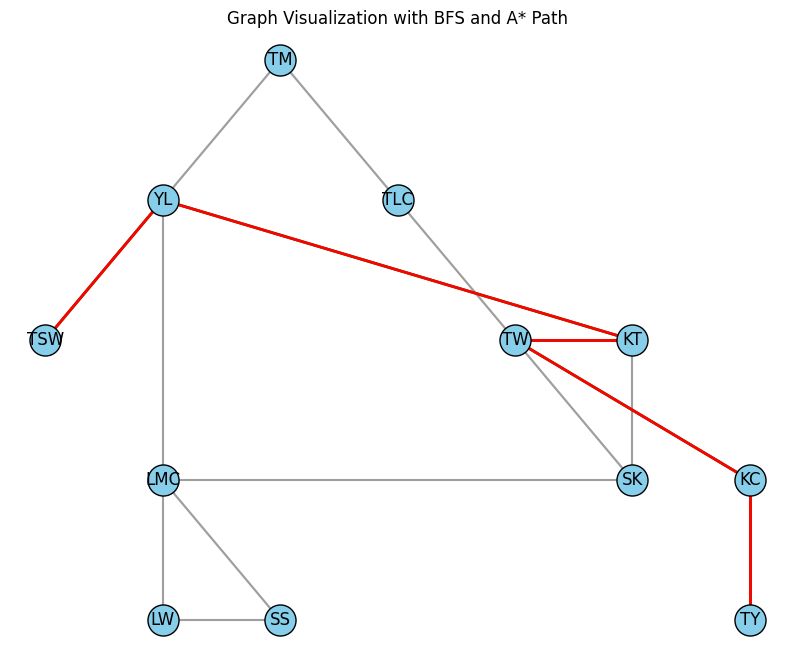

In [9]:
# Plotting the graph with BFS and A* paths
def visualize_graph(graph, path_bfs, path_a_star):
    # Coordinates for each node (manually defined for simplicity)
    pos = {
        'TSW': (0, 4), 'YL': (1, 5), 'TM': (2, 6), 'TLC': (3, 5),
        'TW': (4, 4), 'KT': (5, 4), 'KC': (6, 3), 'SK': (5, 3),
        'TY': (6, 2), 'LMC': (1, 3), 'SS': (2, 2), 'LW': (1, 2)
    }

    # Create figure and axis
    plt.figure(figsize=(10, 8))

    # Plot the edges
    for node, neighbors in graph.items():
        for neighbor, weight in neighbors.items():
            x1, y1 = pos[node]
            x2, y2 = pos[neighbor]
            plt.plot([x1, x2], [y1, y2], 'gray', alpha=0.5)  # Plot edges

    # Highlight BFS path (green)
    bfs_edges = list(zip(path_bfs, path_bfs[1:]))
    for node1, node2 in bfs_edges:
        x1, y1 = pos[node1]
        x2, y2 = pos[node2]
        plt.plot([x1, x2], [y1, y2], 'green', linewidth=2)

    # Highlight A* path (red)
    a_star_edges = list(zip(path_a_star, path_a_star[1:]))
    for node1, node2 in a_star_edges:
        x1, y1 = pos[node1]
        x2, y2 = pos[node2]
        plt.plot([x1, x2], [y1, y2], 'red', linewidth=2)

    # Plot nodes
    for node, (x, y) in pos.items():
        plt.scatter(x, y, s=500, c='skyblue', edgecolors='black', zorder=2)
        plt.text(x, y, node, fontsize=12, ha='center', va='center', color='black', zorder=3)

    plt.title("Graph Visualization with BFS and A* Path")
    plt.axis('off')
    plt.show()

# Test the algorithms and visualize
path_bfs = bfs(graph, 'TSW', 'TY')
path_a_star = a_star(graph, 'TSW', 'TY')

print(f"BFS Path: {path_bfs}")
print(f"A* Path: {path_a_star}")

visualize_graph(graph, path_bfs, path_a_star)